In [1]:
#Importing Libraries

import pandas as pd
import matplotlib.pyplot as plt  
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing  

In [2]:
#Loading Dataset

data = pd.read_csv('Fraud_check.csv')
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


# EDA & Visualization

In [3]:
#converting categorical data
data = pd.get_dummies(data,columns=['Undergrad','Marital.Status','Urban'],drop_first = True)
data

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,68833,50047,10,0,0,1,1
1,33700,134075,18,1,0,0,1
2,36925,160205,30,0,1,0,1
3,50190,193264,15,1,0,1,1
4,81002,27533,28,0,1,0,0
...,...,...,...,...,...,...,...
595,76340,39492,7,1,0,0,1
596,69967,55369,2,1,0,0,1
597,47334,154058,0,0,0,0,1
598,98592,180083,17,1,1,0,0


In [4]:
data["TaxInc"] = pd.cut(data["Taxable.Income"],bins = [10002,30000,99620], labels = ["Risky","Good"])
data

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc
0,68833,50047,10,0,0,1,1,Good
1,33700,134075,18,1,0,0,1,Good
2,36925,160205,30,0,1,0,1,Good
3,50190,193264,15,1,0,1,1,Good
4,81002,27533,28,0,1,0,0,Good
...,...,...,...,...,...,...,...,...
595,76340,39492,7,1,0,0,1,Good
596,69967,55369,2,1,0,0,1,Good
597,47334,154058,0,0,0,0,1,Good
598,98592,180083,17,1,1,0,0,Good


In [5]:
#we assume taxable income<=30000 as risky =0 and others are good =1
data = pd.get_dummies(data,columns = ["TaxInc"],drop_first=True)
data

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc_Good
0,68833,50047,10,0,0,1,1,1
1,33700,134075,18,1,0,0,1,1
2,36925,160205,30,0,1,0,1,1
3,50190,193264,15,1,0,1,1,1
4,81002,27533,28,0,1,0,0,1
...,...,...,...,...,...,...,...,...
595,76340,39492,7,1,0,0,1,1
596,69967,55369,2,1,0,0,1,1
597,47334,154058,0,0,0,0,1,1
598,98592,180083,17,1,1,0,0,1


<function matplotlib.pyplot.show(close=None, block=None)>

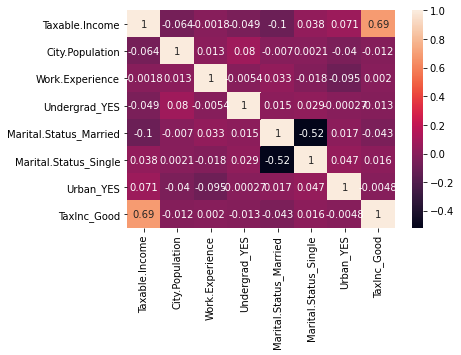

In [6]:
sns.heatmap(data.corr(),annot = True)
plt.show

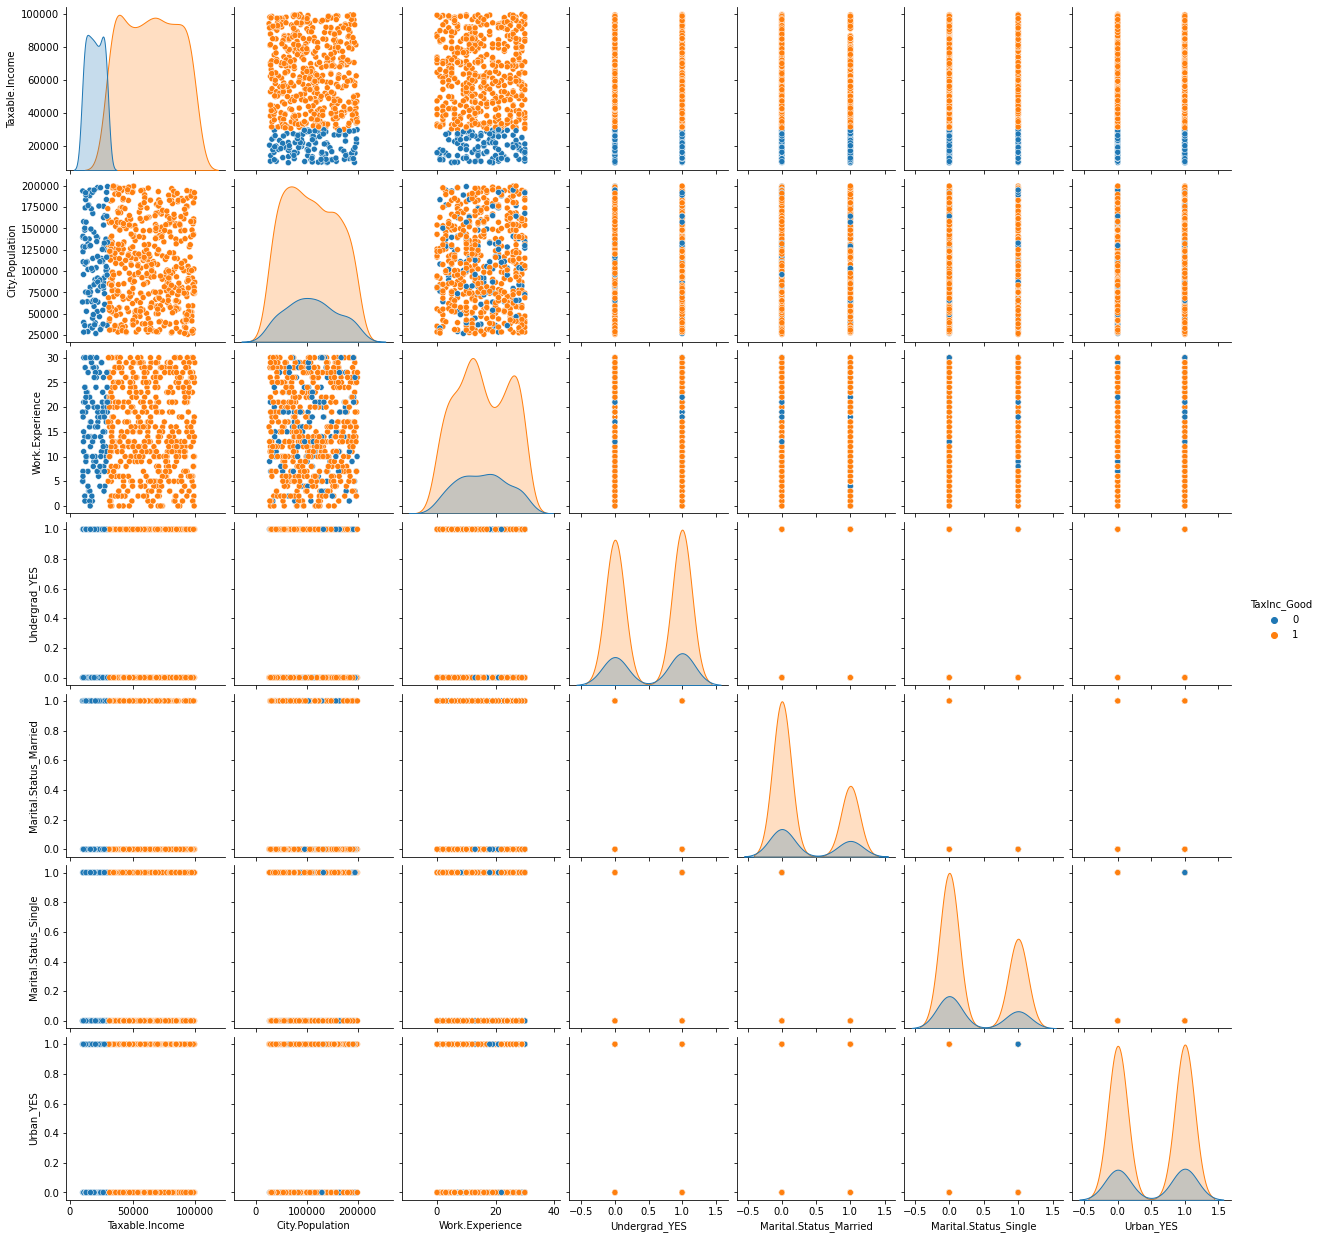

In [7]:
#lets see pair plot to visualize the attributes all at once
import seaborn as sns
sns.pairplot(data = data, hue = 'TaxInc_Good')

In [8]:
#Normalization function
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [9]:
data_norm = norm_func(data.iloc[:,1:])
data_norm

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc_Good
0,0.139472,0.333333,0.0,0.0,1.0,1.0,1.0
1,0.622394,0.600000,1.0,0.0,0.0,1.0,1.0
2,0.772568,1.000000,0.0,1.0,0.0,1.0,1.0
3,0.962563,0.500000,1.0,0.0,1.0,1.0,1.0
4,0.010081,0.933333,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...
595,0.078811,0.233333,1.0,0.0,0.0,1.0,1.0
596,0.170058,0.066667,1.0,0.0,0.0,1.0,1.0
597,0.737240,0.000000,0.0,0.0,0.0,1.0,1.0
598,0.886810,0.566667,1.0,1.0,0.0,0.0,1.0


In [10]:
#Decalring features & target
X = data_norm.drop(['TaxInc_Good'],axis =1)
Y = data_norm['TaxInc_Good']

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
#splitting data into train and test
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y, test_size=0.2,random_state=42)

In [13]:
#Converting the Taxable income variable to bucketing. 
data_norm["income"]="<=30000"
data_norm.loc[data["Taxable.Income"]>=30000,"income"]="Good"
data_norm.loc[data["Taxable.Income"]<=30000,"income"]="Risky"

In [14]:
#Droping taxable income variable
data.drop(["Taxable.Income"],axis = 1,inplace = True)

In [15]:
le=preprocessing.LabelEncoder()
for column_name in data.columns:
    if data[column_name].dtype == object:
        data[column_name] = le.fit_transform(data[column_name])
    else:
         pass

In [16]:
#splitting the data into features and labels
features = data.iloc[:,0:5]
labels = data.iloc[:,5]

In [17]:
# Collecting the column names
colnames = list(data.columns)
predictors = colnames[0:5]
target = colnames[5]

In [18]:
x_train,x_test,y_train,y_test = train_test_split(features,labels,test_size = 0.2,stratify = labels)


In [19]:
##Model building
from sklearn.ensemble import RandomForestClassifier as RF
model = RF(n_jobs = 3,n_estimators = 15, oob_score = True, criterion = "entropy")
model.fit(x_train,y_train)

C:\Users\unic\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


RandomForestClassifier(criterion='entropy', n_estimators=15, n_jobs=3,
                       oob_score=True)

In [20]:
model.estimators_

[DecisionTreeClassifier(criterion='entropy', max_features='sqrt',
                        random_state=626075585),
 DecisionTreeClassifier(criterion='entropy', max_features='sqrt',
                        random_state=266696196),
 DecisionTreeClassifier(criterion='entropy', max_features='sqrt',
                        random_state=664385681),
 DecisionTreeClassifier(criterion='entropy', max_features='sqrt',
                        random_state=1709131261),
 DecisionTreeClassifier(criterion='entropy', max_features='sqrt',
                        random_state=1277403223),
 DecisionTreeClassifier(criterion='entropy', max_features='sqrt',
                        random_state=591858911),
 DecisionTreeClassifier(criterion='entropy', max_features='sqrt',
                        random_state=1097241306),
 DecisionTreeClassifier(criterion='entropy', max_features='sqrt',
                        random_state=2051098332),
 DecisionTreeClassifier(criterion='entropy', max_features='sqrt',
          

In [21]:
model.classes_

array([0, 1], dtype=uint8)

In [29]:
model.n_features_in_

5

In [30]:
model.n_classes_

2

In [31]:
model.n_outputs_

1

In [32]:
model.oob_score_

0.5229166666666667

In [33]:
prediction = model.predict(x_train)
prediction

array([0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,

In [34]:
#finding accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_train,prediction)
accuracy

0.9958333333333333

In [35]:
np.mean(prediction == y_train)

0.9958333333333333

In [36]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_train,prediction)
confusion

array([[236,   2],
       [  0, 242]], dtype=int64)

In [37]:
#prediction on test data
pred_test = model.predict(x_test)
pred_test

array([1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0], dtype=uint8)

In [38]:
acc_test =accuracy_score(y_test,pred_test)
acc_test

0.48333333333333334

# Decision Tree
ENTROPY CRITERIA

In [39]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

[Text(0.625, 0.875, 'x[0] <= 197560.5\nentropy = 1.0\nsamples = 480\nvalue = [238, 242]'),
 Text(0.5, 0.625, 'x[1] <= 22.5\nentropy = 1.0\nsamples = 474\nvalue = [232, 242]'),
 Text(0.25, 0.375, 'x[0] <= 98392.5\nentropy = 0.994\nsamples = 352\nvalue = [160, 192]'),
 Text(0.125, 0.125, 'entropy = 0.962\nsamples = 166\nvalue = [64, 102]'),
 Text(0.375, 0.125, 'entropy = 0.999\nsamples = 186\nvalue = [96, 90]'),
 Text(0.75, 0.375, 'x[0] <= 35303.0\nentropy = 0.976\nsamples = 122\nvalue = [72, 50]'),
 Text(0.625, 0.125, 'entropy = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.875, 0.125, 'entropy = 0.988\nsamples = 115\nvalue = [65, 50]'),
 Text(0.75, 0.625, 'entropy = 0.0\nsamples = 6\nvalue = [6, 0]')]

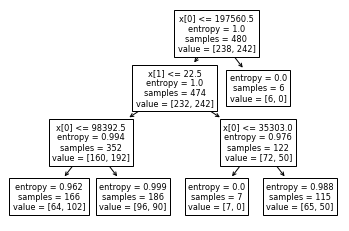

In [40]:
from sklearn import tree
tree.plot_tree(model)

In [41]:
colnames = list(data.columns)
colnames

['City.Population',
 'Work.Experience',
 'Undergrad_YES',
 'Marital.Status_Married',
 'Marital.Status_Single',
 'Urban_YES',
 'TaxInc_Good']

[Text(0.625, 0.875, 'population <= 197560.5\nentropy = 1.0\nsamples = 480\nvalue = [238, 242]\nclass = 0'),
 Text(0.5, 0.625, 'experience <= 22.5\nentropy = 1.0\nsamples = 474\nvalue = [232, 242]\nclass = 0'),
 Text(0.25, 0.375, 'population <= 98392.5\nentropy = 0.994\nsamples = 352\nvalue = [160, 192]\nclass = 0'),
 Text(0.125, 0.125, 'entropy = 0.962\nsamples = 166\nvalue = [64, 102]\nclass = 0'),
 Text(0.375, 0.125, 'entropy = 0.999\nsamples = 186\nvalue = [96, 90]\nclass = 1'),
 Text(0.75, 0.375, 'population <= 35303.0\nentropy = 0.976\nsamples = 122\nvalue = [72, 50]\nclass = 1'),
 Text(0.625, 0.125, 'entropy = 0.0\nsamples = 7\nvalue = [7, 0]\nclass = 1'),
 Text(0.875, 0.125, 'entropy = 0.988\nsamples = 115\nvalue = [65, 50]\nclass = 1'),
 Text(0.75, 0.625, 'entropy = 0.0\nsamples = 6\nvalue = [6, 0]\nclass = 1')]

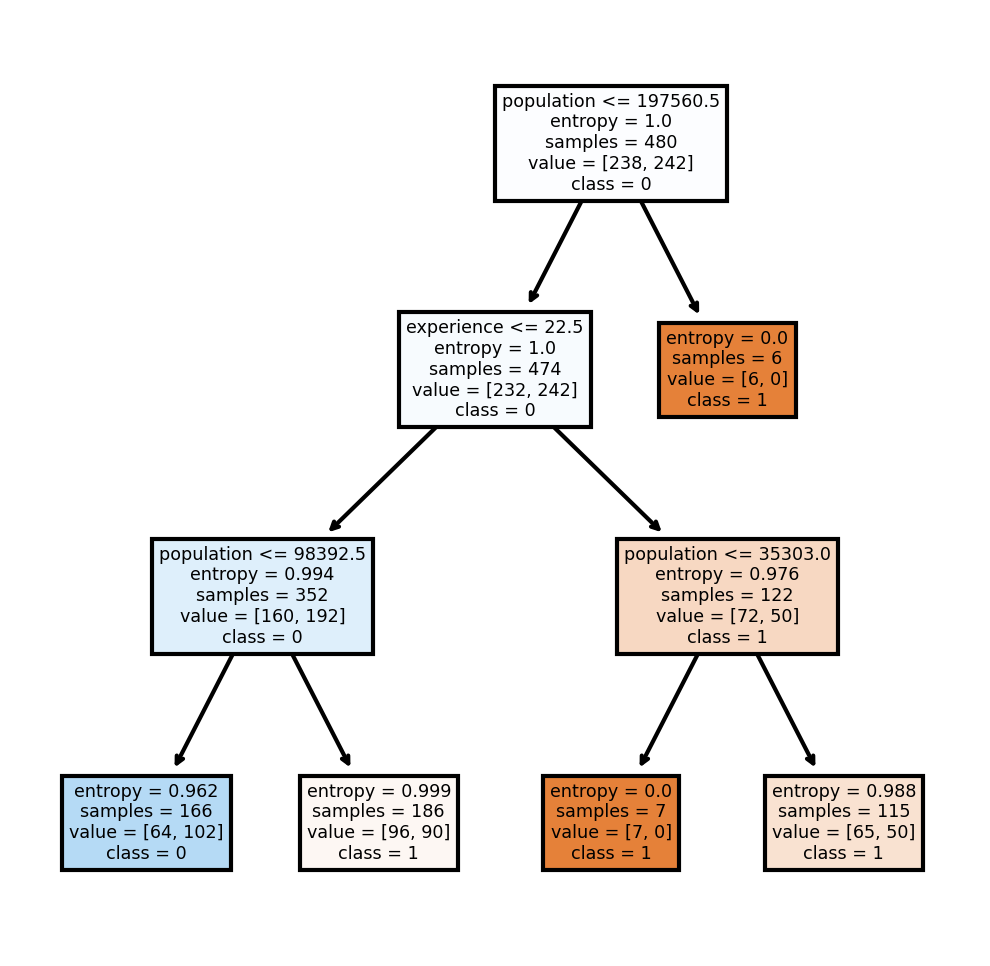

In [42]:
fn=['population','experience','Undergrad_YES','Marital.Status_Married','Marital.Status_Single','Urban_YES']
cn=['1', '0']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True)

In [43]:
text = tree.export_text(model,max_depth=3)
print(text)

|--- feature_0 <= 197560.50
|   |--- feature_1 <= 22.50
|   |   |--- feature_0 <= 98392.50
|   |   |   |--- class: 1
|   |   |--- feature_0 >  98392.50
|   |   |   |--- class: 0
|   |--- feature_1 >  22.50
|   |   |--- feature_0 <= 35303.00
|   |   |   |--- class: 0
|   |   |--- feature_0 >  35303.00
|   |   |   |--- class: 0
|--- feature_0 >  197560.50
|   |--- class: 0



In [44]:
model.feature_importances_

array([0.76863805, 0.23136195, 0.        , 0.        , 0.        ])

In [45]:
preds = model.predict(x_test)
pd.Series(preds).value_counts()

0    90
1    30
dtype: int64

In [46]:
preds

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0], dtype=uint8)

In [47]:
pd.crosstab(y_test,preds)

col_0,0,1
Urban_YES,,
0,45,15
1,45,15


In [48]:
np.mean(preds == y_test)

0.5

# Decision Tree
GINI CRITERIA

In [49]:
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [50]:
pred=model.predict(x_test)
np.mean(preds==y_test)

0.5

# Decision Tree
REGRESSION

In [51]:
from sklearn.tree import DecisionTreeRegressor
array = data.values
x = array[:,0:4]
y = array[:,3]

In [52]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [53]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [54]:
model.score(X_test,y_test) 

1.0

In [55]:
model.score(X_train,y_train) 

1.0